In [2]:
import pandas as pd

file_path = '../Data/Dataset.csv'

# Load the CSV file using latin-1 encoding
df = pd.read_csv(file_path, encoding='latin-1')

# The file loads with columns named 'v1' and 'v2' from the header.
# Let's rename them to something more meaningful.
df.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)

# --- Data Exploration ---
# 1. Display the first 5 rows to confirm it loaded correctly
print("--- First 5 Rows ---")
print(df.head())

# 2. Get a summary of the DataFrame
print("\n--- DataFrame Info ---")
df.info()

# 3. Check the label distribution
print("\n--- Label Distribution ---")
print(df['label'].value_counts())

--- First 5 Rows ---
  label                                            message Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   label       5572 non-null   object
 1   message     5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 

In [3]:
# Keep only the first two columns and assign it back to df
df = df[['label', 'message']]

# Verify the changes by checking the info again
print("--- DataFrame Info After Cleanup ---")
df.info()

--- DataFrame Info After Cleanup ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# 1. Prepare the Labels by mapping 'ham' to 0 and 'spam' to 1
df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# 2. Create our feature matrix (X) and target vector (y)
X = df['message']
y = df['label_num']

# 3. Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize the TF-IDF Vectorizer to convert text into numerical features.
tfidf = TfidfVectorizer(stop_words='english')

# 5. Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# 6. Only transform the test data using the already-fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

print("Data successfully preprocessed!")
print(f"Number of features (unique words): {X_train_tfidf.shape[1]}")
print(f"Shape of training data: {X_train_tfidf.shape}")
print(f"Shape of testing data: {X_test_tfidf.shape}")

Data successfully preprocessed!
Number of features (unique words): 7472
Shape of training data: (4457, 7472)
Shape of testing data: (1115, 7472)


--- Naive Bayes Model Performance ---
Accuracy: 0.9668
Precision: 1.0000
Recall: 0.7533

--- Confusion Matrix ---


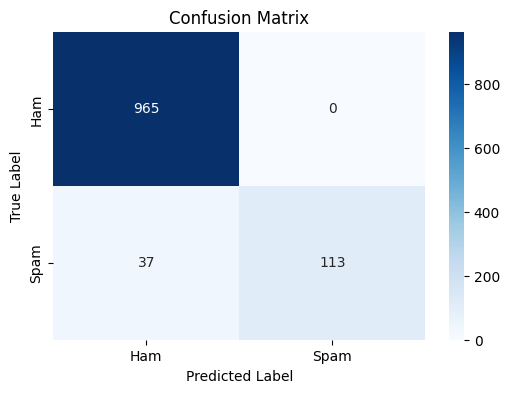

In [6]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize and train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# 2. Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)

# 3. Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"--- Naive Bayes Model Performance ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("\n--- Confusion Matrix ---")

# Plotting the confusion matrix for better visualization
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

--- SVM Model Performance ---
Accuracy: 0.9794
Precision: 0.9704
Recall: 0.8733

--- Confusion Matrix (SVM) ---


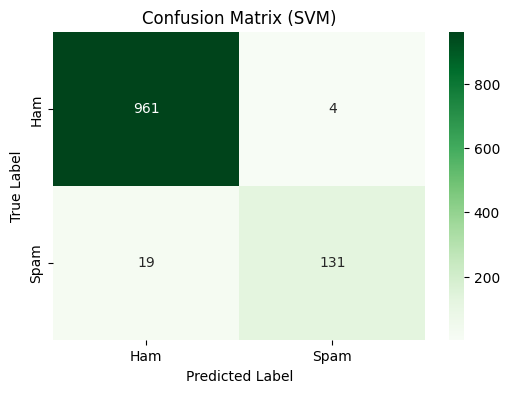

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Initialize and train the Support Vector Machine (SVM) model
#using a linear kernel, which works well for text data.
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)

# 2. Make predictions on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)

# 3. Evaluate the model's performance
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

print(f"--- SVM Model Performance ---")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print("\n--- Confusion Matrix (SVM) ---")

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (SVM)')
plt.show()

In [8]:
import numpy as np

# 'tfidf' is our vectorizer and 'svm_model' is our trained SVM
def classify_message(message):
    # Transform the new message using the same TF-IDF vectorizer
    message_tfidf = tfidf.transform([message])

    # Make a prediction using the trained SVM model
    prediction = svm_model.predict(message_tfidf)

    # Return the readable label
    if prediction[0] == 0:
        return "This is a Ham message."
    else:
        return "This is a Spam message."

# --- Test the function with new messages ---
spam_example = "Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/claim-your-prize to claim now."
ham_example = "Hey, are you free for dinner tonight around 8pm?"

print(f"Testing a spam message: '{spam_example}'")
print(f"Prediction: {classify_message(spam_example)}")
print("-" * 30)
print(f"Testing a ham message: '{ham_example}'")
print(f"Prediction: {classify_message(ham_example)}")

Testing a spam message: 'Congratulations! You've won a $1000 Walmart gift card. Go to http://bit.ly/claim-your-prize to claim now.'
Prediction: This is a Spam message.
------------------------------
Testing a ham message: 'Hey, are you free for dinner tonight around 8pm?'
Prediction: This is a Ham message.


In [9]:
import joblib

# --- SAVE THE MODEL AND VECTORIZER ---

# Save the vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

# Save the SVM model
joblib.dump(svm_model, 'svm_model.pkl')

print("Model and vectorizer saved!")


# --- LOAD AND USE THE MODEL IN A NEW SESSION ---
# This code could be in a separate script or run later

# Load the vectorizer
loaded_vectorizer = joblib.load('tfidf_vectorizer.pkl')

# Load the model
loaded_model = joblib.load('svm_model.pkl')

# Use them to make a prediction
new_message = "You have a new voice message. Click here to listen."
new_message_tfidf = loaded_vectorizer.transform([new_message])
prediction = loaded_model.predict(new_message_tfidf)

if prediction[0] == 1:
    print("Prediction: Spam")
else:
    print("Prediction: Ham")

Model and vectorizer saved!
Prediction: Spam


In [10]:
from sklearn.model_selection import GridSearchCV

# Define a 'grid' of parameters to test
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf']  # Type of kernel to use
}

# Create a GridSearchCV object
# cv=3 means it will use 3-fold cross-validation
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=3, verbose=2)

# Fit it to the training data (this may take a few minutes)
grid_search.fit(X_train_tfidf, y_train)

# Get the best model found by the search
best_svm = grid_search.best_estimator_

print(f"Best parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ...............................C=0.1, kernel=linear; total time=   0.9s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.1s
[CV] END ...............................C=0.1, kernel=linear; total time=   1.0s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.9s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.7s
[CV] END ..................................C=0.1, kernel=rbf; total time=   1.7s
[CV] END .................................C=1, kernel=linear; total time=   0.8s
[CV] END .................................C=1, kernel=linear; total time=   0.8s
[CV] END .................................C=1, kernel=linear; total time=   0.8s
[CV] END ....................................C=1, kernel=rbf; total time=   2.0s
[CV] END ....................................C=1, kernel=rbf; total time=   2.0s
[CV] END ....................................C=1,

In [12]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
